<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


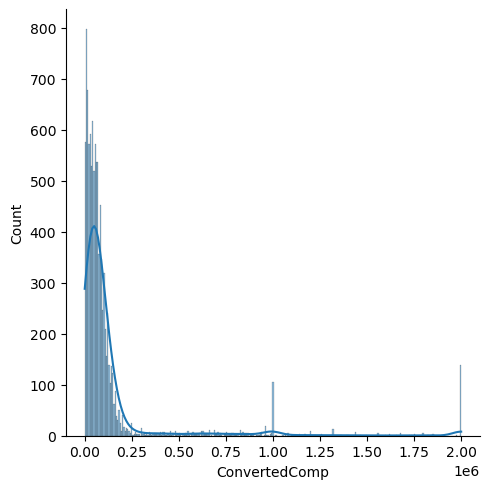

In [60]:
# your code goes here
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df['ConvertedComp'], kde = True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


<function matplotlib.pyplot.show(close=None, block=None)>

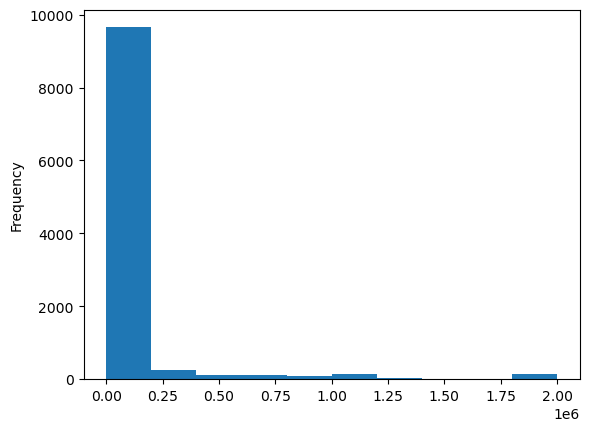

In [43]:
# your code goes here
df['ConvertedComp'].plot(kind="hist")
plt.show

What is the median of the column `ConvertedComp`?


In [19]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [22]:
# your code goes here
man_only_count = df[(df['Gender'] == 'Man')].shape[0]
man_only_count

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [34]:
# your code goes here
woman_only_count = df[(df['Gender'] == 'Woman')]#.shape[0]
print(woman_only_count.shape[0])
print(woman_only_count['ConvertedComp'].median())

731
57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [24]:
# your code goes here
age_min = df['Age'].min()
age_q1 = df['Age'].quantile(0.25)
age_median = df['Age'].median()
age_q3 = df['Age'].quantile(0.75)
age_max = df['Age'].max()

print(f"Minimum Age: {age_min}")
print(f"Q1 (25th Percentile): {age_q1}")
print(f"Median Age (Q2): {age_median}")
print(f"Q3 (75th Percentile): {age_q3}")
print(f"Maximum Age: {age_max}")

Minimum Age: 16.0
Q1 (25th Percentile): 25.0
Median Age (Q2): 29.0
Q3 (75th Percentile): 35.0
Maximum Age: 99.0


Plot a histogram of the column `Age`.


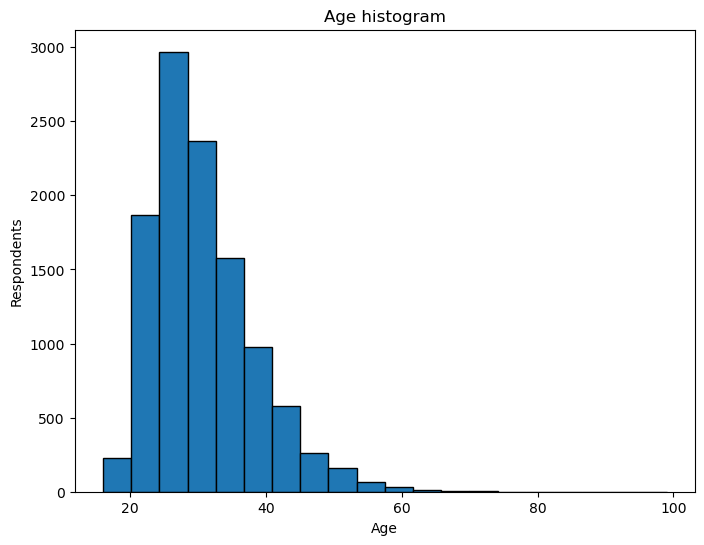

In [33]:
# your code goes here
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.title('Age histogram')
plt.xlabel('Age')
plt.ylabel('Respondents')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


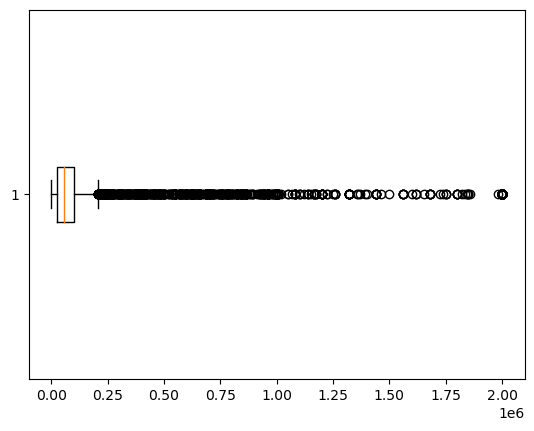

In [62]:
# your code goes here
df_cleaned = df.dropna(subset=['ConvertedComp'])
plt.boxplot(df_cleaned['ConvertedComp'], vert=False)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [83]:
# your code goes here
Q1 = df_cleaned['ConvertedComp'].quantile(0.25)
Q3 = df_cleaned['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [84]:
# your code goes here
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

209698.0
-82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [85]:
# your code goes here
outliers_above_upper_bound = df_cleaned[df_cleaned['ConvertedComp'] > upper_bound]
outliers_below_lower_bound = df_cleaned[df_cleaned['ConvertedComp'] < lower_bound]

#Calculate the total number of outliers
total_outliers = len(outliers_above_upper_bound) + len(outliers_below_lower_bound)

total_outliers

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [99]:
# your code goes here
# Clip values
df1= df_cleaned[(df_cleaned['ConvertedComp'] > (lower_bound)) & (df_cleaned['ConvertedComp'] < (upper_bound))]

In [100]:
df1['ConvertedComp'].median()

52704.0

In [101]:
df1['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [106]:
# your code goes here
# Отфильтровать только числовые столбцы
numerical_columns = df_cleaned.select_dtypes(include=['number'])

# Вычислить корреляцию
correlation_matrix = numerical_columns.corr()
age_correlation = correlation_matrix['Age'].sort_values(ascending=False)
age_correlation

Age              1.000000
ConvertedComp    0.314283
WorkWeekHrs      0.031592
CompTotal        0.006949
Respondent       0.002394
CodeRevHrs      -0.015742
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
